<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-machine-learning/blob/main/Agglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Agglomerative Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data, true_labels = make_blobs(n_samples = 6000,n_features=5, centers = 4, random_state = 0)
data

In [ ]:
pca = PCA(n_components=2)
data_new = pca.fit_transform(data)
data_new

array([[-9.62427534, -2.97627324],
       [-3.88795655,  8.09309275],
       [-0.48505557, -4.99038419],
       ...,
       [15.59925132,  0.09667711],
       [14.52605387, -0.85265199],
       [14.66531963, -0.25969683]])

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
pred_labels = agg_clustering.fit_predict(data_new)
pred_labels

array([3, 2, 1, ..., 0, 0, 0])

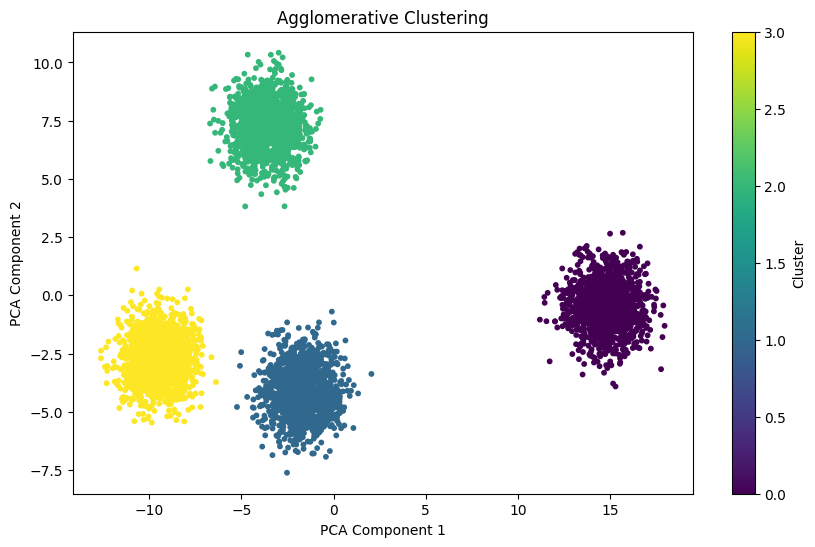

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_new[:, 0], data_new[:, 1], c=pred_labels, s=10)
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
sil_score = silhouette_score(data, pred_labels)
db_score = davies_bouldin_score(data, pred_labels)
ari_score = adjusted_rand_score(true_labels, pred_labels)
nmi_score = normalized_mutual_info_score(true_labels, pred_labels)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {db_score}')
print(f'Adjusted Rand Index: {ari_score}')
print(f'Normalized Mutual Information: {nmi_score}')

Silhouette Score: 0.7451285875608243
Davies-Bouldin Index: 0.36765882829662805
Adjusted Rand Index: 0.9995554814403182
Normalized Mutual Information: 0.9990005464833299


### Silhouette Score & Davies-Bouldin Index For AgglomerativeClustering

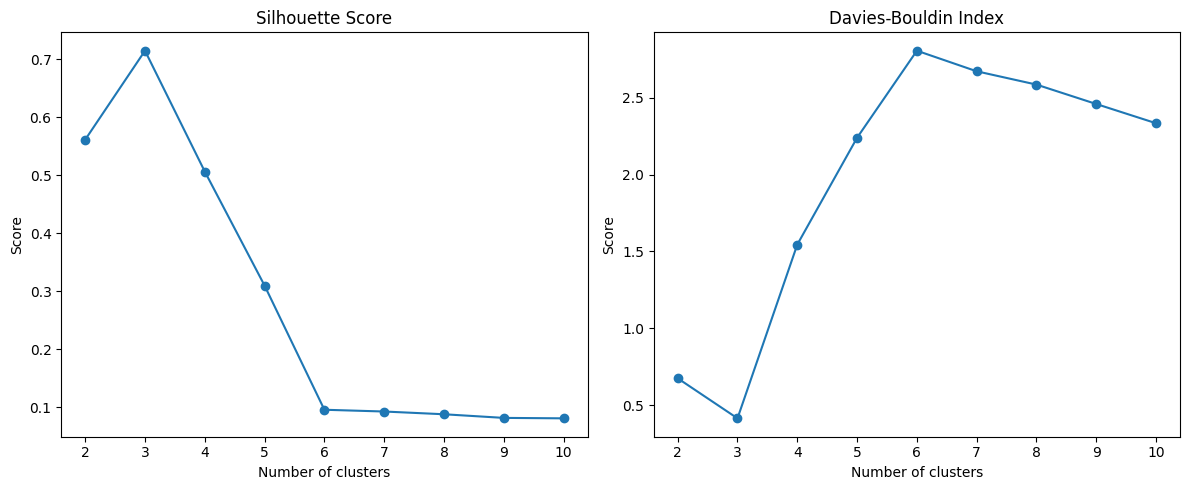

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

data, _ = make_blobs(n_samples=6000, n_features=5, centers=3, random_state=0)

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

cluster_range = range(2, 11)
silhouette_scores = []
davies_bouldin_scores = []

for n_clusters in cluster_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg_clustering.fit_predict(data)
    sil_score = silhouette_score(data, cluster_labels)
    silhouette_scores.append(sil_score)
    db_score = davies_bouldin_score(data, cluster_labels)
    davies_bouldin_scores.append(db_score)



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()
